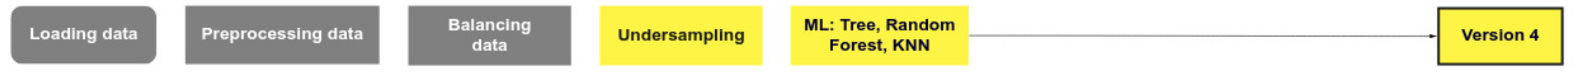

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree     import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.metrics         import accuracy_score, classification_report, confusion_matrix, recall_score
from yellowbrick.classifier  import ConfusionMatrix

In [2]:
with open("data_balanced_under.pkl", 'rb') as f:
    x_train, x_test, y_train, y_test = pickle.load(f)

<IPython.core.display.Javascript object>

In [3]:
x_train.shape, y_train.shape

((10008, 23), (10008,))

In [4]:
x_test.shape, y_test.shape

((7500, 23), (7500,))

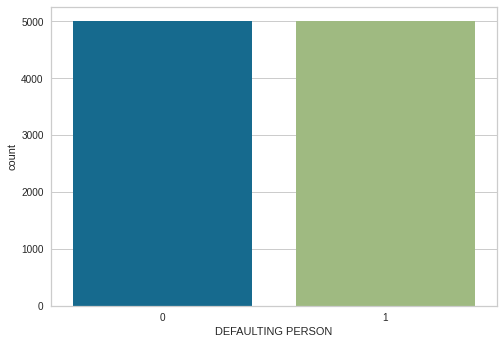

In [5]:
sns.countplot(x = y_train);

In [6]:
x_train.head()

,LIMIT_BAL,GENDER,EDUCATION,MARITAL STATUS,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,30000,2,3,1,37,1,2,2,2,0,...,29346,23548,11790,7276,0,3313,108,299,325,0
1,100000,2,2,2,41,0,0,0,0,0,...,85590,79747,70468,63235,3600,3289,2632,2449,2300,2539
2,50000,2,3,1,46,0,0,0,0,2,...,16227,17746,7496,7877,2000,1600,2100,1930,500,500
3,80000,2,3,1,49,0,0,0,0,0,...,61001,58759,58212,56534,2179,2226,2004,2132,2030,2057
4,50000,2,3,1,55,0,0,0,0,0,...,38003,11625,18442,9743,1963,2025,562,339,1200,600


# MACHINE LEARNING

In [7]:
version4_accuracy = [] # version4 = [tree, random_forest, knn] for accuracy
version4_recall = [] # version4 = [tree, random_forest, knn] for recall

# Decision Tree

In [8]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
v4_tree = tree.predict(x_test)

In [9]:
version4_accuracy.append( accuracy_score(y_test, v4_tree) )
version4_recall.append( recall_score(y_test, v4_tree, pos_label='1') )

In [10]:
print(classification_report(y_test, v4_tree))

              precision    recall  f1-score   support

           0       0.85      0.63      0.73      5868
           1       0.32      0.61      0.42      1632

    accuracy                           0.63      7500
   macro avg       0.59      0.62      0.57      7500
weighted avg       0.74      0.63      0.66      7500



In [11]:
cf_tree = confusion_matrix(y_test, v4_tree)

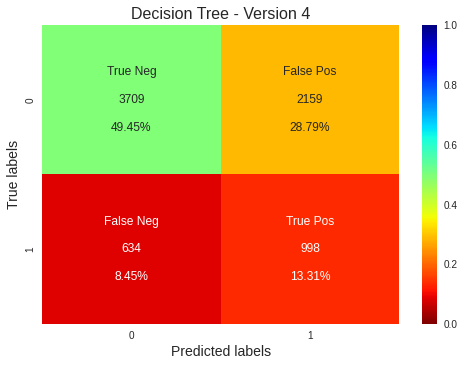

In [12]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

group_counts = ["{:0.0f}".format(value) for value in cf_tree.flatten()]

group_percentage = ["{0:0.2%}".format(value) for value in cf_tree.flatten()/np.sum(cf_tree)]

labels = [f"{v1}\n\n{v2}\n\n{v3}" for v1,v2,v3 in zip(group_names, group_counts, group_percentage)]

labels = np.asarray(labels).reshape(2,2)

ax = plt.subplot()



sns.heatmap(cf_tree/np.sum(cf_tree), annot=labels, fmt='', cmap = 'jet_r', vmin = 0, vmax = 1, ax = ax)

ax.set_xlabel('Predicted labels', fontsize = 14)
ax.set_ylabel('True labels', fontsize = 14)

plt.title("Decision Tree - Version 4", fontsize = 16)

plt.show()

# Random Forest

In [13]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
v4_rf = rf.predict(x_test)

In [14]:
version4_accuracy.append( accuracy_score(y_test, v4_rf) )
version4_recall.append( recall_score(y_test, v4_rf, pos_label='1') )

In [15]:
print(classification_report(y_test, v4_rf))

              precision    recall  f1-score   support

           0       0.88      0.79      0.83      5868
           1       0.45      0.62      0.52      1632

    accuracy                           0.75      7500
   macro avg       0.66      0.70      0.68      7500
weighted avg       0.79      0.75      0.76      7500



In [16]:
cf_rf = confusion_matrix(y_test, v4_rf)

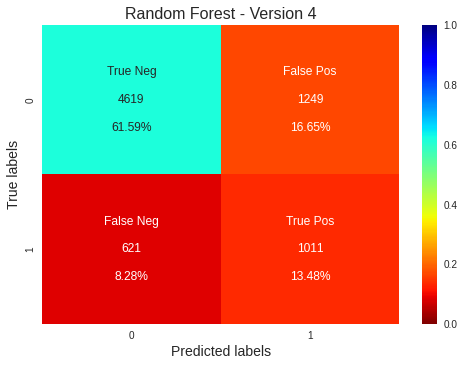

In [18]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

group_counts = ["{:0.0f}".format(value) for value in cf_rf.flatten()]

group_percentage = ["{0:0.2%}".format(value) for value in cf_rf.flatten()/np.sum(cf_rf)]

labels = [f"{v1}\n\n{v2}\n\n{v3}" for v1,v2,v3 in zip(group_names, group_counts, group_percentage)]

labels = np.asarray(labels).reshape(2,2)

ax = plt.subplot()



sns.heatmap(cf_rf/np.sum(cf_rf), annot=labels, fmt='', cmap = 'jet_r', vmin = 0, vmax = 1, ax = ax)

ax.set_xlabel('Predicted labels', fontsize = 14)
ax.set_ylabel('True labels', fontsize = 14)

plt.title("Random Forest - Version 4", fontsize = 16)

plt.show()

# KNN

In [19]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
v4_knn = knn.predict(x_test)

In [20]:
version4_accuracy.append( accuracy_score(y_test, v4_knn) )
version4_recall.append( recall_score(y_test, v4_knn, pos_label='1') )

In [21]:
print(classification_report(y_test, v4_knn))

              precision    recall  f1-score   support

           0       0.83      0.58      0.68      5868
           1       0.28      0.59      0.38      1632

    accuracy                           0.58      7500
   macro avg       0.56      0.58      0.53      7500
weighted avg       0.71      0.58      0.62      7500



In [22]:
cf_knn = confusion_matrix(y_test, v4_knn)

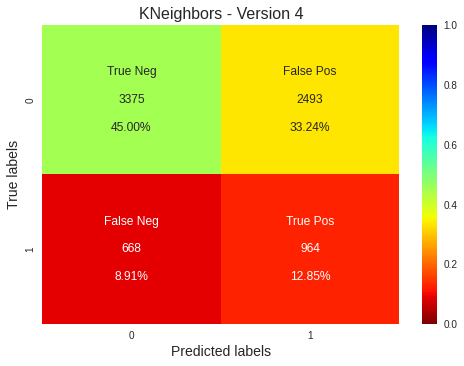

In [23]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

group_counts = ["{:0.0f}".format(value) for value in cf_knn.flatten()]

group_percentage = ["{0:0.2%}".format(value) for value in cf_knn.flatten()/np.sum(cf_knn)]

labels = [f"{v1}\n\n{v2}\n\n{v3}" for v1,v2,v3 in zip(group_names, group_counts, group_percentage)]

labels = np.asarray(labels).reshape(2,2)

ax = plt.subplot()



sns.heatmap(cf_knn/np.sum(cf_knn), annot=labels, fmt='', cmap = 'jet_r', vmin = 0, vmax = 1, ax = ax)

ax.set_xlabel('Predicted labels', fontsize = 14)
ax.set_ylabel('True labels', fontsize = 14)

plt.title("KNeighbors - Version 4", fontsize = 16)

plt.show()

# Saving and storaging the results

In [24]:
accuracy = pd.read_csv('accuracy_versions.csv')
recall = pd.read_csv("recall_versions.csv")

accuracy

,Algorithms,Version 1,Version 2,Version 3
0,Decision Tree,0.733600,0.818782,0.721333
1,Random Forest,0.819067,0.817401,0.814667
2,KNN,0.762133,0.770861,0.607467


In [25]:
recall

,Algorithms,Version 1,Version 2,Version 3
0,Decision Tree,0.409314,0.358220,0.411152
1,Random Forest,0.368260,0.359337,0.395833
2,KNN,0.194240,0.097050,0.530025


In [26]:
accuracy['Version 4'] = version4_accuracy
recall['Version 4'] = version4_recall

In [27]:
accuracy

,Algorithms,Version 1,Version 2,Version 3,Version 4
0,Decision Tree,0.733600,0.818782,0.721333,0.627600
1,Random Forest,0.819067,0.817401,0.814667,0.750667
2,KNN,0.762133,0.770861,0.607467,0.578533


In [28]:
recall

,Algorithms,Version 1,Version 2,Version 3,Version 4
0,Decision Tree,0.409314,0.358220,0.411152,0.611520
1,Random Forest,0.368260,0.359337,0.395833,0.619485
2,KNN,0.194240,0.097050,0.530025,0.590686


In [29]:
accuracy.to_csv("accuracy_versions.csv", index=None)

recall.to_csv("recall_versions.csv", index = None)